<a href="https://colab.research.google.com/github/ajadams123/ATMS-597-SP-2020-Project-3-Group-H/blob/master/alexProj3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
!apt-get -qq install libproj-dev proj-data proj-bin libgeos-dev
!pip install Cython
!pip install --upgrade --force-reinstall shapely --no-binary shapely
!pip install cartopy
!pip install netcdf4
!pip install pydap

Selecting previously unselected package libgeos-dev.
(Reading database ... 134443 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Selecting previously unselected package libproj-dev:amd64.
Preparing to unpack .../libproj-dev_4.9.3-2_amd64.deb ...
Unpacking libproj-dev:amd64 (4.9.3-2) ...
Selecting previously unselected package proj-bin.
Preparing to unpack .../proj-bin_4.9.3-2_amd64.deb ...
Unpacking proj-bin (4.9.3-2) ...
Setting up libproj-dev:amd64 (4.9.3-2) ...
Setting up libgeos-dev (3.6.2-1build2) ...
Setting up proj-bin (4.9.3-2) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
     |████████████████████████████████| 358kB 5.0MB/s 
Skipping wheel build for shapely, due to binaries being disabled for it.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Shapely 1.7.0
    U

In [0]:
import cartopy.crs as ccrs

In [5]:
#downloading long term monthly means for anomaly calculation
hght500mean1981_2010 = xr.open_dataset('http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/hgt.mon.1981-2010.ltm.nc',engine='netcdf4').sel(level=500)
hght850mean1981_2010 = xr.open_dataset('http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/hgt.mon.1981-2010.ltm.nc',engine='netcdf4').sel(level=850)
uwind500mean1981_2010 = xr.open_dataset('http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/uwnd.mon.1981-2010.ltm.nc',engine='netcdf4').sel(level=500)
vwind500mean1981_2010 = xr.open_dataset('http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/vwnd.mon.1981-2010.ltm.nc',engine='netcdf4').sel(level=500)
wspd500mean1981_2010 = xr.open_dataset('http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/wspd.mon.1981-2010.ltm.nc',engine='netcdf4').sel(level=500)
uwind850mean1981_2010 = xr.open_dataset('http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/uwnd.mon.1981-2010.ltm.nc',engine='netcdf4').sel(level=850)
vwind850mean1981_2010 = xr.open_dataset('http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/vwnd.mon.1981-2010.ltm.nc',engine='netcdf4').sel(level=850)
temp850mean1981_2010 = xr.open_dataset('http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/air.mon.1981-2010.ltm.nc',engine='netcdf4').sel(level=850)
sphum850mean1981_2010 = xr.open_dataset('http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/shum.mon.1981-2010.ltm.nc',engine='netcdf4').sel(level=850)
wspd850mean1981_2010 = xr.open_dataset('http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/wspd.mon.1981-2010.ltm.nc',engine='netcdf4').sel(level=850)


/usr/local/lib/python3.6/dist-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time ax

In [0]:
#selecting only December, January, February months

def is_djf(month):
    return (month == 12) | (month <= 2)

hght500djf = hght500mean1981_2010.sel(time=is_djf(hght500mean1981_2010['time.month']))
hght850djf = hght850mean1981_2010.sel(time=is_djf(hght850mean1981_2010['time.month']))
uwind500djf = uwind500mean1981_2010.sel(time=is_djf(uwind500mean1981_2010['time.month']))
vwind500djf = vwind500mean1981_2010.sel(time=is_djf(vwind500mean1981_2010['time.month']))
wspd500djf = wspd500mean1981_2010.sel(time=is_djf(wspd500mean1981_2010['time.month']))
uwind850djf = uwind850mean1981_2010.sel(time=is_djf(uwind850mean1981_2010['time.month']))
vwind850djf = vwind850mean1981_2010.sel(time=is_djf(vwind850mean1981_2010['time.month']))
wspd850djf = wspd850mean1981_2010.sel(time=is_djf(wspd850mean1981_2010['time.month']))
temp850djf = temp850mean1981_2010.sel(time=is_djf(temp850mean1981_2010['time.month']))
sphum850djf = sphum850mean1981_2010.sel(time=is_djf(sphum850mean1981_2010['time.month']))

In [0]:
#calculating seasonal mean for each field
hght500djfmean = hght500djf.mean(dim = 'time')
hght850djfmean = hght850djf.mean(dim = 'time')
uwind500djfmean = uwind500djf.mean(dim = 'time')
vwind500djfmean = vwind500djf.mean(dim = 'time')
wspd500djfmean = wspd500djf.mean(dim = 'time')
uwind850djfmean = uwind850djf.mean(dim = 'time')
vwind850djfmean = vwind850djf.mean(dim = 'time')
wspd850djfmean = wspd850djf.mean(dim = 'time')
temp850djfmean = temp850djf.mean(dim = 'time')
sphum850djfmean = sphum850djf.mean(dim = 'time')

In [0]:
means = [hght500djfmean,hght850djfmean,uwind500djfmean,vwind500djfmean,wspd500djfmean,uwind850djfmean,vwind850djfmean,wspd850djfmean,temp850djfmean,sphum850djfmean]
elev = ['500','600','700','850']

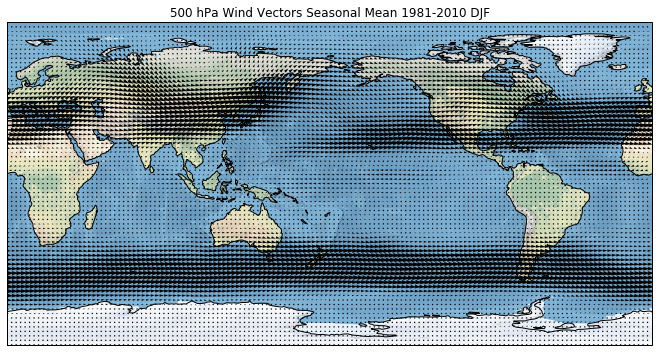

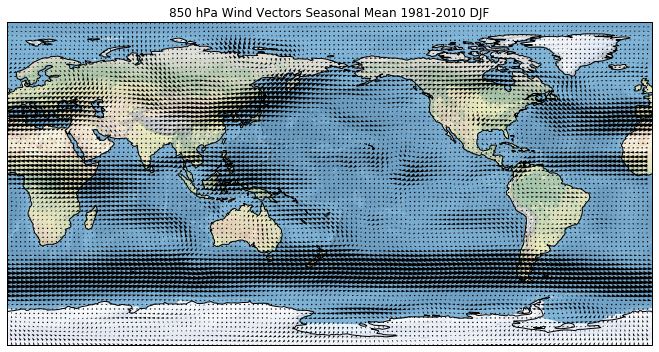

In [39]:
#Plotting winds
ind = [0,3]
for i in range(0,2):
    fig = plt.figure(figsize=(10,5))

    ax = plt.axes(projection=ccrs.PlateCarree(central_longitude = 180) )

    plt.quiver(means[ind[i]+2]['lon'], means[ind[i]+2]['lat'], means[ind[i]+2]['uwnd'], means[ind[i]+3]['vwnd'])
    ax.coastlines()

    plt.title(elev[ind[i]]+ ' hPa Wind Vectors Seasonal Mean 1981-2010 DJF')
    #plt.colorbar().set_label('Temperature(C)')
    plt.tight_layout()
    ax.stock_img()
    plt.show()
    fig.savefig('winds' + elev[ind[i]] + 'djfmean.png')

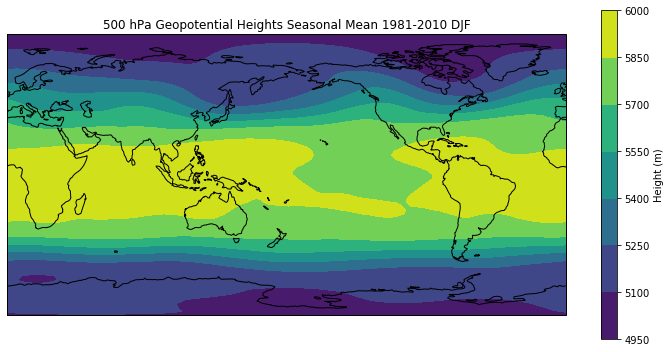

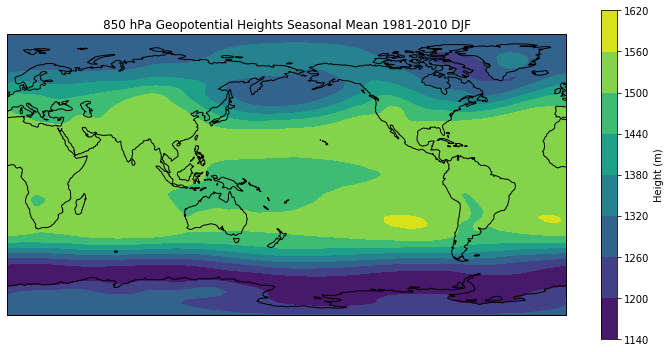

In [44]:
#Plotting Geopotential Heights
elev = ['500','850']
for i in range(0,2):
    fig = plt.figure(figsize=(10,5))

    ax = plt.axes(projection=ccrs.PlateCarree(central_longitude = 180) )

    plt.contourf(means[i]['lon'], means[i]['lat'], means[i]['hgt'], 
             transform=ccrs.PlateCarree(), cmap='viridis')
    ax.coastlines()
    ax.stock_img()
    plt.title(elev[i] + ' hPa Geopotential Heights Seasonal Mean 1981-2010 DJF')
    plt.colorbar().set_label('Height (m)')
    plt.tight_layout()
    plt.show()
    fig.savefig('hght' + elev[i] + 'djfmean.png')

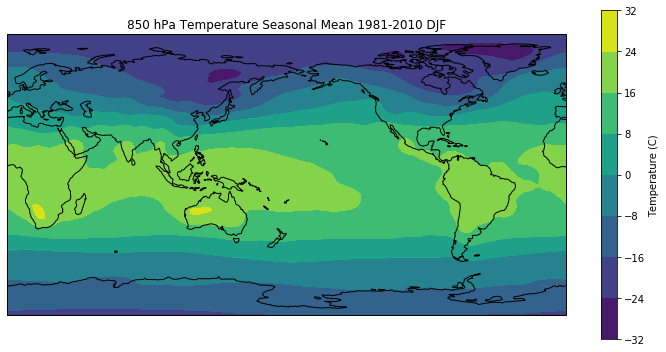

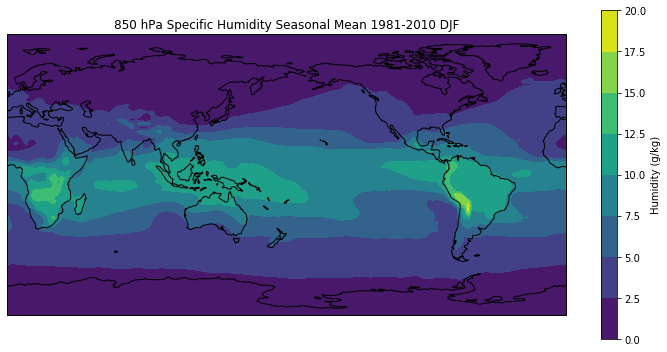

In [51]:
#Plotting Temps and Specific Humidity
names = ['air', 'shum', 'Temperature', 'Specific Humidity', 'Temperature (C)', 'Humidity (g/kg)']
for i in range(0,2):
    fig = plt.figure(figsize=(10,5))

    ax = plt.axes(projection=ccrs.PlateCarree(central_longitude = 180) )

    plt.contourf(means[i+8]['lon'], means[i+8]['lat'], means[i+8][names[i]], 
             transform=ccrs.PlateCarree(), cmap='viridis')
    ax.coastlines()

    plt.title('850 hPa ' + names[i+2] + ' Seasonal Mean 1981-2010 DJF')
    plt.colorbar().set_label(names[i+4])
    plt.tight_layout()
    plt.show()
    fig.savefig(names[i] + '850djfmean.png')  

In [0]:
#daily averages of geopotential height
hght500 = []
for date in dates
    print('working on '+str(year))
    hght500ds = xr.open_dataset('http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/pressure/hgt.'+str(year)+'.nc',engine='netcdf4').sel(level=500,time = date)
    hght500.append(hght500ds)
hght500conc = xr.concat(hght500, dim='time')
print('500mb heights concat done')




working on 1948
working on 1949
working on 1950
working on 1951
working on 1952
working on 1953
working on 1954
working on 1955
working on 1956
working on 1957
working on 1958
working on 1959
working on 1960
working on 1961
working on 1962
working on 1963
working on 1964
working on 1965
working on 1966
working on 1967
working on 1968
working on 1969
working on 1970
working on 1971
working on 1972
working on 1973
working on 1974
working on 1975
working on 1976
working on 1977
working on 1978
working on 1979
working on 1980
working on 1981
working on 1982
working on 1983
working on 1984
working on 1985
working on 1986
working on 1987
working on 1988
working on 1989
working on 1990
working on 1991
working on 1992
working on 1993
working on 1994
working on 1995
working on 1996
working on 1997
working on 1998
working on 1999
working on 2000
working on 2001
working on 2002
working on 2003
working on 2004
working on 2005
working on 2006
working on 2007
working on 2008
working on 2009
working 

In [0]:
#daily averages of 500mb uwind
uwind500 = []
for year in range(1948, 2020):
    print('working on '+str(year))
    uwind500ds = xr.open_dataset('http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/pressure/uwnd.'+str(year)+'.nc',engine='netcdf4').sel(level=500)
    uwind500.append(uwind500ds)
uwind500conc = xr.concat(uwind500, dim='time')
print('500mb uwind concat done')

#daily averages of 500mb vwind
vwind500 = []
for year in range(1948, 2020):
    print('working on '+str(year))
    vwind500ds = xr.open_dataset('http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/pressure/vwnd.'+str(year)+'.nc',engine='netcdf4').sel(level=500)
    vwind500.append(vwind500ds)
vwind500conc = xr.concat(vwind500, dim='time')
print('500mb vwind concat done')
